In [2]:
import xml.etree.ElementTree as etree
import random, math
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
#import simpy
import scipy.optimize as op
import time
import pymc3 as pm 
import pandas as pd
import theano.tensor as tt
import seaborn as sb

/Users/tortysivill/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
SEED = [20100425, 20100234]


data_ids = []
tester_ids = []
level_ids = []
contexts = []
left_obstacles = []
right_obstacles = []
start_lane = []
decisions = []

j = 0

In [4]:
for i in range(0,200):
    tree = etree.parse('log'+ str(i) + '.xml')
    root = tree.getroot()
    for child in root:
        if child.find('stagetype') == None:
            continue
        elif child.find('stagetype').text == 'trial':
            data_ids.append(j)
            tester_ids.append(i)
            level_ids.append(child.find('trialdescription').text)
            contexts.append(child.find('level').text)
            left_obstacles.append(child.find('leftobstacles').text)
            right_obstacles.append(child.find('rightobstacles').text)
            start_lane.append(child.find('startlane').text)
            decisions.append(child.find('answer').text)
            j += 1


In [5]:
data = []

print(len(data_ids))

for i in range(0,200):
    data.append([])

for i in range(0,4702):
    
    print(contexts[i])
    print(left_obstacles[i])
    print(right_obstacles[i])
    print("###############")
    
    left_self_value = 0
    left_old_value = 0
    left_young_value = 0
    left_man_value = 0
    left_kneeling_value = 0
    left_pavement_value = 0
    
    right_self_value = 0
    right_old_value = 0
    right_young_value = 0
    right_man_value = 0
    right_kneeling_value = 0
    right_pavement_value = 0
    
    switch_self_value = 0
    switch_old_value = 0
    switch_young_value = 0
    switch_man_value = 0
    switch_kneeling_value = 0
    switch_pavement_value = 0
    
    stay_self_value = 0
    stay_old_value = 0
    stay_young_value = 0
    stay_man_value = 0
    stay_kneeling_value = 0
    stay_pavement_value = 0
    
    
    choice = 0 
    result = []
    if contexts[i] == "mountain":
        print("in mountain")
        ### left obstacle:
        
        man_var = left_obstacles[i].split('n')
        if man_var[1] == ",":
            left_self_value = 0
            left_old_value = 0
            left_young_value = 0
            left_man_value = 1
            left_kneeling_value = 0
            left_pavement_value = 0
        else:
            man_number = man_var[1][0]
            #left = [0,0,0,int(man_number),0,0]
            left_self_value = 0
            left_old_value = 0
            left_young_value = 0
            left_man_value = int(man_number)
            left_kneeling_value = 0
            left_pavement_value = 0
        level = level_ids[i].split('.')
        if level[0] == '2':
            #right = [1,0,0,0,0,0]
            print("in self")
            right_self_value = 1

        else:
            man_var = right_obstacles[i].split('n')
            if man_var[1] == ",":
                #right_man_value = [0,0,0,1,0,0]
                right_man_value = 1
            else:
                man_number = man_var[1][0]
                #right = [0,0,0,int(man_number),0,0]
                right_man_value = int(man_number)


    elif contexts[i] == "cityr":
        print("in cityr")
        man_boy = left_obstacles[i][0]
        if man_boy == "b":
            boy_var = left_obstacles[i].split('y')
            if boy_var[1] == ",":
                #left = [0,0,1,0,0,0]
                left_young_value = 1
            else:
                boy_number = boy_var[1][0]
                #left = [0,0,int(boy_number),0,0,0]
                left_young_value = int(boy_number)
        else:
            man_var = left_obstacles[i].split('n')
            if man_var[1] == ",":
                #left = [0,0,0,1,0,0]
                left_man_value = 1
            else:
                man_number = man_var[1][0]
                #left = [0,0,0,int(man_number),0,0]
                #left = [0,0,0,1,0,0]
                left_man_value = int(man_number)

        man_var = right_obstacles[i].split('n')
        if man_var[1] == ",":
            #right = [0,0,0,1,0,1]
            right_man_value = 1
            right_pavement_value = 1
        else:
            man_number = man_var[1][0]
            #right = [0,0,0,1,0,1]
            right_man_value = int(man_number)
            right_pavement_value = 1


    elif contexts[i] == "cityl":
        print("in cityl")
        man_boy = right_obstacles[i][0]
        if man_boy == "b":
            boy_var = right_obstacles[i].split('y')
            if boy_var[1] == ",":
                #right = [0,0,1,0,0,0]
                right_young_value = 1
            else:
                boy_number = boy_var[1][0]
                #right = [0,0,int(boy_number),0,0,0]
                #right = [0,0,1,0,0,0]
                right_young_value = int(boy_number)

        else:
            man_var = right_obstacles[i].split('n')
            if man_var[1] == ",":
                #right = [0,0,0,1,0,0]
                right_pavement_value = 1
            else:
                man_number = man_var[1][0]
                #right = [0,0,0,int(man_number),0,0]
                #right = [0,0,0,1,0,0]
                right_man_value = int(man_number)

        man_var = left_obstacles[i].split('n')
        if man_var[1] == ",":
            #left = [0,0,0,1,0,1]
            left_man_value = 1
            left_pavement_value = 1

        else:
            man_number = man_var[1][0]
            #left = [0,0,0,int(man_number),0,1]	
            #left = [0,0,0,1,0,1]
            left_man_value = int(man_number)
            left_pavement_value = 1	
    else:
        print("in suburb")
        if left_obstacles[i] == "boy,":
            #left = [0,0,1,0,0,0]
            left_young_value = 1
        elif left_obstacles[i] == "oldman,":
            #eft = [0,1,0,0,0,0]
            left_old_value = 1
        elif left_obstacles[i] == "kneelingman,":
            #eft = [0,0,0,0,1,0]
            left_kneeling_value = 1
        elif left_obstacles[i] == "man,":
            #left = [0,0,0,1,0,0]
            left_man_value = 1

        if right_obstacles[i] == "boy,":
            #right = [0,0,1,0,0,0]
            right_young_value = 1
        elif right_obstacles[i] == "oldman,":
            #right = [0,1,0,0,0,0]
            right_old_value = 1
        elif right_obstacles[i] == "kneelingman,":
            #right = [0,0,0,0,1,0]
            right_kneeling_value = 1
        elif right_obstacles[i] == "man,":
            #right = [0,0,0,1,0,0]
            right_man_value = 1


    ###### switch = 1 stay = 0      
    if(decisions[i] == "right"):
        if start_lane[i] == "left":
            choice = 1
            
            switch_self_value = right_self_value
            switch_old_value = right_old_value
            switch_young_value = right_young_value
            switch_man_value = right_man_value
            switch_kneeling_value = right_kneeling_value
            switch_pavement_value = right_pavement_value
            
            stay_self_value = left_self_value
            stay_old_value = left_old_value
            stay_young_value = left_young_value
            stay_man_value = left_man_value
            stay_kneeling_value = left_kneeling_value
            stay_pavement_value = left_pavement_value
        else:
            choice = 0
            
                
            switch_self_value = left_self_value
            switch_old_value = left_old_value
            switch_young_value = left_young_value
            switch_man_value = left_man_value
            switch_kneeling_value = left_kneeling_value
            switch_pavement_value = left_pavement_value
            
            stay_self_value = right_self_value
            stay_old_value = right_old_value
            stay_young_value = right_young_value
            stay_man_value = right_man_value
            stay_kneeling_value = right_kneeling_value
            stay_pavement_value = right_pavement_value
            
            
    else:
        if start_lane[i] == "left":
            choice = 0
            
            switch_self_value = right_self_value
            switch_old_value = right_old_value
            switch_young_value = right_young_value
            switch_man_value = right_man_value
            switch_kneeling_value = right_kneeling_value
            switch_pavement_value = right_pavement_value
            
            stay_self_value = left_self_value
            stay_old_value = left_old_value
            stay_young_value = left_young_value
            stay_man_value = left_man_value
            stay_kneeling_value = left_kneeling_value
            stay_pavement_value = left_pavement_value
        else:
            choice = 1
            
            switch_old_value = left_old_value
            switch_self_value = left_self_value
            switch_young_value = left_young_value
            switch_man_value = left_man_value
            switch_kneeling_value = left_kneeling_value
            switch_pavement_value = left_pavement_value
            
            stay_self_value = right_self_value
            stay_old_value = right_old_value
            stay_young_value = right_young_value
            stay_man_value = right_man_value
            stay_kneeling_value = right_kneeling_value
            stay_pavement_value = right_pavement_value

    """result.append(data_ids[i])
    result.append(tester_ids[i])
    result.append(left)
    result.append(right)
    result.append(choice)"""

    

    result.append(tester_ids[i])

    #stay
    result.append(stay_self_value)
    result.append(stay_old_value)
    result.append(stay_young_value)
    result.append(stay_man_value)
    result.append(stay_kneeling_value)
    result.append(stay_pavement_value)

    #switch
    result.append(switch_self_value)
    result.append(switch_old_value)
    result.append(switch_young_value)
    result.append(switch_man_value)
    result.append(switch_kneeling_value)
    result.append(switch_pavement_value)

    result.append(choice)


    print("###############")


    data[tester_ids[i]].append(result)

4702
suburb
boy,
kneelingman,
###############
in suburb
###############
cityl
man,
man5,
###############
in cityl
###############
cityr
man2,
man,
###############
in cityr
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man,
man6,
###############
in mountain
###############
cityr
boy2,
man,
###############
in cityr
###############
cityr
man3,
man,
###############
in cityr
###############
cityl
man2,
boy,
###############
in cityl
###############
cityr
man4,
man,
###############
in cityr
###############
cityr
boy,
man,
###############
in cityr
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
ol

###############
cityl
man,
boy2,
###############
in cityl
###############
cityr
man3,
man,
###############
in cityr
###############
suburb
oldman,
man,
###############
in suburb
###############
cityr
man5,
man,
###############
in cityr
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
cityr
man4,
man,
###############
in cityr
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man,
man2,
###############
in mountain
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man,
man4,
###############
in mountain
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
suburb
man,
kneelingman,
###############
in suburb
###############
cityr
boy,
man2,
###############
in cityr
###############
cityl
man,
man7,
###############
in cityl
###############
suburb
oldman,
kneelingma

man,
###############
in mountain
###############
suburb
man,
oldman,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
cityl
man,
man4,
###############
in cityl
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
suburb
man,
boy,
###############
in suburb
###############
suburb
kneelingman,
man,
###############
in suburb
###############
cityl
man,
man5,
###############
in cityl
###############
cityr
boy2,
man,
###############
in cityr
###############
mountain
man,
man6,
###############
in mountain
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man,
man2,
###############
in mountain
###############
mountain
man5,
empty,
###############
in mountain
in self
#

boy,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man2,
man,
###############
in mountain
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityl
man,
man4,
###############
in cityl
###############
cityl
man,
man3,
###############
in cityl
###############
cityl
man,
man2,
###############
in cityl
###############
suburb
oldman,
man,
###############
in suburb
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
man,
kneelingman,
###############
in suburb
###############
cityr
boy,
man,
###############
in cityr
###############
cityl
man,
boy2,
###############
in cityl
###############
suburb
boy,
man,
###############
in suburb
###############
mountain
man6,
man,
###############
in mountain
###############
suburb
oldm

mountain
man7,
empty,
###############
in mountain
in self
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
cityl
man,
man3,
###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityl
man,
man4,
###############
in cityl
###############
cityl
man,
man7,
###############
in cityl
###############
cityl
man,
man2,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
cityl
man,
man6,
###############
in cityl
###############
suburb
man,
oldman,
###############
in suburb
###############
mountain
man2,
man,
###############
in mountain
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
cityr
man4,
man

man7,
empty,
###############
in mountain
in self
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
cityr
man2,
man,
###############
in cityr
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
mountain
man4,
man,
###############
in mountain
###############
cityr
man4,
man,
###############
in cityr
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityr
man3,
man,
###############
in cityr
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityr
boy2,
man,
###############
in cityr
###############
mountain
man2,
man,
###############
in mountain
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
mountain
man,
man6,
###############
in mountain
###############
cityl
man,
man5,
###############
in cityl
###############
mountain
man5,
empty

man,
###############
in cityr
###############
cityr
man4,
man,
###############
in cityr
###############
cityr
man6,
man,
###############
in cityr
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityr
boy,
man2,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man,
man4,
###############
in mountain
###############
cityr
man5,
man,
###############
in cityr
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
suburb
man,
oldman,
###############
in suburb
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
suburb
oldman,
man,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
########

man5,
###############
in cityl
###############
suburb
boy,
oldman,
###############
in suburb
###############
cityr
man3,
man,
###############
in cityr
###############
suburb
oldman,
man,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
cityr
boy,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
boy,
man2,
###############
in cityr
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityl
man,
man6,
###############
in cityl
###############
cityr
man2,
man,
###############
in cityr
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
cityr
man4,
man,
###############
in 

mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
man4,
man,
###############
in cityr
###############
suburb
man,
kneelingman,
###############
in suburb
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
mountain
man2,
man,
###############
in mountain
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
man,
boy,
###############
in suburb
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityr
boy,
man,
###############
in cityr
###############
suburb
oldman,
man,
###############
in suburb
###############
mountain
man6,
man,
###############
in mountain
###############
cityr
man6,
man,
###############
in cityr
###############
cityl
man,
man5,
###############
in cityl
###############
cityr
boy2,
man,
###############
in cityr
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mount

man2,
boy,
###############
in cityl
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man,
man6,
###############
in cityl
###############
cityl
man,
man3,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man4,
man,
###############
in mountain
###############
cityr
man5,
man,
###############
in cityr
###############
cityr
man4,
man,
###############
in cityr
###############
cityr
man2,
man,
###############
in cityr
###############
cityr
boy2,
man,
###############
in cityr
###############
suburb
oldman,
man,
###############
in suburb
####

man7,
man,
###############
in cityr
###############
cityl
man,
man5,
###############
in cityl
###############
mountain
man,
man2,
###############
in mountain
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityr
boy,
man2,
###############
in cityr
###############
suburb
kneelingman,
man,
###############
in suburb
###############
cityl
man,
man4,
###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
man2,
man,
###############
in cityr
###############
cityr
boy,
man,
###############
in cityr
###############
suburb
boy,
man,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man6,
man,
###############
in mountain
###############
mountain
man5,
empty,
###############
in mountain
i

boy2,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
boy,
man2,
###############
in cityr
###############
mountain
man,
man4,
###############
in mountain
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man,
man4,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
cityr
man2,
man,
###############
in cityr
###############
cityr
man5,
man,
###############
in cityr
###############
suburb
oldman,
man,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
suburb
boy,
man,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man,
man2,
###############
in mountain
###############
cityr
boy,
man,
###############
in cityr
###############
moun

###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
suburb
kneelingman,
man,
###############
in suburb
###############
mountain
man6,
man,
###############
in mountain
###############
cityr
man4,
man,
###############
in cityr
###############
suburb
oldman,
boy,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityr
boy,
man2,
###############
in cityr
###############
cityl
man,
man5,
###############
in cityl
###############
cityr
boy,
man,
###############
in cityr
###############
cityr
man7,
man,
###############
in cityr
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man,
man4,
###############
in mount

###############
in cityr
###############
cityr
man5,
man,
###############
in cityr
###############
suburb
boy,
oldman,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man6,
man,
###############
in mountain
###############
cityl
man2,
boy,
###############
in cityl
###############
cityr
man2,
man,
###############
in cityr
###############
suburb
kneelingman,
man,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man6,
man,
###############
in mountain
###############
cityl
man,
boy,
###############
in cityl
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityr
man5,
man,
###############
in cityr
###############
suburb
boy,
man,
###############
in suburb
###############
cityl
man,
man4,
###############
in cityl
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
mountain
ma

man,
man2,
###############
in cityl
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man,
man6,
###############
in mountain
###############
cityr
man7,
man,
###############
in cityr
###############
cityr
man6,
man,
###############
in cityr
###############
cityr
man5,
man,
###############
in cityr
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
oldman,
boy,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
cityr
man3,
man,
###############
in cityr
###############
cityr
man4,
man,
###############
in cityr
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
mountain


in mountain
in self
###############
mountain
man6,
man,
###############
in mountain
###############
cityr
boy2,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
man2,
man,
###############
in cityr
###############
cityr
man5,
man,
###############
in cityr
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
boy,
oldman,
###############
in suburb
###############
cityl
man,
man3,
###############
in cityl
###############
suburb
oldman,
man,
###############
in suburb
###############
mountain
man,
man4,
###############
in mountain
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityl
man,
man4,
###############
in cityl
###############
cityl
man,
boy,
###############
in cityl
###############
ci

in mountain
in self
###############
cityr
man6,
man,
###############
in cityr
###############
mountain
man6,
man,
###############
in mountain
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
suburb
kneelingman,
man,
###############
in suburb
###############
cityr
boy,
man,
###############
in cityr
###############
mountain
man6,
man,
###############
in mountain
###############
suburb
boy,
man,
###############
in suburb
###############
cityr
man3,
man,
###############
in cityr
###############
suburb
man,
kneelingman,
###############
in suburb
###############
cityr
man6,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
boy,
man,
###############
in cityr
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man4,
man,
###############
in mountain
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man4,


man2,
###############
in cityr
###############
suburb
man,
oldman,
###############
in suburb
###############
cityl
man,
man3,
###############
in cityl
###############
cityl
man,
man5,
###############
in cityl
###############
mountain
man6,
man,
###############
in mountain
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
man4,
man,
###############
in cityr
###############
suburb
oldman,
man,
###############
in suburb
###############
cityl
man2,
boy,
###############
in cityl
###############
mountain
man2,
man,
###############
in mountain
###############
cityl
man,
boy,
###############
in cityl
###############
cityr
boy2,
man,
###############
in cityr
###############
suburb
boy,
man,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man7,
empty,


empty,
###############
in mountain
in self
###############
cityl
man,
man7,
###############
in cityl
###############
cityr
boy2,
man,
###############
in cityr
###############
cityl
man,
man3,
###############
in cityl
###############
suburb
oldman,
man,
###############
in suburb
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
cityr
man5,
man,
###############
in cityr
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityr
man2,
man,
###############
in cityr
###############
cityl
man,
man4,
###############
in cityl
###############
cityr
man6,
man,
###############
in cityr
###############
suburb
oldman,
boy,
###############
in suburb
###############
mountain
man2,
man,
###############
in mountain
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man2,
boy,
###############
in cityl
###############
subu

###############
suburb
boy,
oldman,
###############
in suburb
###############
suburb
man,
oldman,
###############
in suburb
###############
cityr
man3,
man,
###############
in cityr
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man4,
man,
###############
in mountain
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityl
man,
man7,
###############
in cityl
###############
cityr
boy2,
man,
###############
in cityr
###############
cityl
man2,
boy,
###############
in cityl
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
boy,
man,
###############
in cityr
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
suburb
oldman,
man,
##

###############
suburb
oldman,
man,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
man7,
man,
###############
in cityr
###############
cityl
man,
man3,
###############
in cityl
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
cityr
man5,
man,
###############
in cityr
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
suburb
oldman,
boy,
###############
in suburb
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityr
boy,
man,
###############
in cityr
###############
cityr
man2,
man,
###############
in cityr
###############
cityr
man6,
man,
###############
in ci

in mountain
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityl
man,
man7,
###############
in cityl
###############
suburb
oldman,
man,
###############
in suburb
###############
suburb
boy,
oldman,
###############
in suburb
###############
cityr
man5,
man,
###############
in cityr
###############
mountain
man4,
man,
###############
in mountain
###############
cityl
man,
boy,
###############
in cityl
###############
cityr
boy2,
man,
###############
in cityr
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
mountain
man,
man2,
###############
in mountain
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityl
man,
man3,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man3,
empty,

###############
in suburb
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityr
man5,
man,
###############
in cityr
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityl
man,
boy,
###############
in cityl
###############
suburb
oldman,
man,
###############
in suburb
###############
cityr
man2,
man,
###############
in cityr
###############
cityl
man,
man3,
###############
in cityl
###############
cityr
boy,
man2,
###############
in cityr
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityr
boy2,
man,
###############
in cityr
###############
mountain
man,
man2,
###############
in mountain
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityr
man7,
man,
###############
in cityr
###############
suburb

cityr
boy,
man2,
###############
in cityr
###############
cityr
boy2,
man,
###############
in cityr
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
cityl
man,
man5,
###############
in cityl
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man4,
man,
###############
in mountain
###############
suburb
man,
oldman,
###############
in suburb
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
mountain
man,
man6,
###############
in mountain
###############
cityr
man3,
man,
###############
in cityr
###############
cityl
man,
man7,
###############
in cityl
###############
cityr
man4,
man,
###############
in cityr
###############
mountain
man6,
man,
###############
in mountain
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man,
man2,
###############
in mountain

in cityr
###############
suburb
man,
boy,
###############
in suburb
###############
cityr
man7,
man,
###############
in cityr
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man,
man2,
###############
in mountain
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityl
man,
boy2,
###############
in cityl
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityl
man2,
boy,
###############
in cityl
###############
mountain
man6,
man,
###############
in mountain
###############
cityl
man,
man4,
###############
in cityl
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man2,
man,
###############
in mountain
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityl

in cityl
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
cityr
man7,
man,
###############
in cityr
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man2,
man,
###############
in mountain
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
cityr
man5,
man,
###############
in cityr
###############
mountain
man,
man6,
###############
in mountain
###############
cityl
man,
boy2,
###############
in cityl
###############
suburb
oldman,
man,
###############
in suburb
###############
cityl
man,
man2,
###############
in cityl
###############
suburb
kneelingman,
man,
###############
in suburb
###############
mountain
man2,
man,
###############
in mountain
###############
mountain
man5,
empty,
###############
in mountain
in self
#############

###############
in cityl
###############
suburb
man,
boy,
###############
in suburb
###############
suburb
kneelingman,
man,
###############
in suburb
###############
cityr
man6,
man,
###############
in cityr
###############
cityl
man,
man7,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityl
man2,
boy,
###############
in cityl
###############
mountain
man4,
man,
###############
in mountain
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityl
man,
man2,
###############
in cityl
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
cityl
man,
boy,
###############
in cityl
###############
suburb
oldman,
boy,
###############
in s

In [6]:
for j in data:
    for i in j:
        print(i)
        print("")
    print("#########")

data_orig = data

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

[0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1]

[0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1]

[0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0]

[0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1


[11, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[11, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[11, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0]

[11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1]

[11, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[11, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]

[11, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[11, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[11, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[11, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0]

[11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1]

[11, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[11, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1]

[11, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[11, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[11, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1]

[11, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

[11, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

#########
[12, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0]

[12, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0]

[12, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0]



[32, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

#########
[33, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[33, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[33, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0]

[33, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[33, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[33, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[33, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[33, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[33, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0]

[33, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[33, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

[33, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[33, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]

[33, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[33, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[33, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0]

[33, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1]

[33, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

[33, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[33, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[33, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]



[62, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[62, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[62, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

[62, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0]

[62, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[62, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[62, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[62, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[62, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0]

[62, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[62, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

#########
[63, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[63, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[63, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[63, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0]

[63, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]

[63, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[63, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[63, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[63, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[63, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[63, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0]


[88, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[88, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[88, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

[88, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[88, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[88, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]

[88, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]

[88, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[88, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[88, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[88, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

[88, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1]

#########
[89, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[89, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0]

[89, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

[89, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

[89, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1]

[89, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

[89, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

[89, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[89, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1]

[89, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1]




[120, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

[120, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

[120, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[120, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[120, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0]

[120, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[120, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[120, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[120, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[120, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0]

[120, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

[120, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[120, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[120, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1]

[120, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[120, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

[120, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]

[120, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0]

[120, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[120, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[120, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[120, 0, 0, 2, 0, 0, 0, 0, 0, 0, 

[148, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[148, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1]

[148, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[148, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1]

[148, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[148, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1]

[148, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

[148, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[148, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

[148, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

#########
[149, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[149, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[149, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0]

[149, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

[149, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

[149, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1]

[149, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[149, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

[149, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[149, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[149, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[149, 0, 1, 0, 0, 0, 0, 


[179, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[179, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

[179, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

[179, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0]

[179, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[179, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0]

[179, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0]

[179, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

[179, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[179, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[179, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[179, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1]

[179, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[179, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]

[179, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1]

[179, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[179, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[179, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

[179, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[179, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1]

[179, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[179, 0, 0, 0, 5, 0, 0, 0, 0, 0, 

In [7]:
data = []
data_new_test = []

for i in data_orig:
    for j in range(len(i)):
        if j < 13:
            data.append(i[j])
        else:
            data_new_test.append(i[j])

print(data_new_test)

[[0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 

In [8]:
data_test = []

for j in range(0,len(data)):
    for i in data[j]:
        data_test.append(i)

print(len(data_test))

36106


In [9]:
new_data = np.array(data_test).reshape(2579,14)


a = "t"
b = "stay_sv"
c = "stay_ov"
d = "stay_yv"
e = "stay_mv"
f = "stay_kv"
g = "stay_pv"

h = "switch_sv"
i = "switch_ov"
j = "switch_yv"
k = "switch_mv"
l = "switch_kv"
m = "switch_pv"
n = "c"

l = [a,b,c,d,e,f,g,h,i,j,k,l,m,n]

df = pd.DataFrame(new_data, columns = l)


indiv_traces = {}



#c_data = df.loc[df['t'] == 0]
c_data = df
c_data = c_data.reset_index(drop=True)

stay_sv = c_data["stay_sv"]
stay_ov = c_data["stay_ov"]
stay_yv = c_data["stay_yv"]
stay_mv = c_data["stay_mv"]
stay_kv = c_data["stay_kv"]
stay_pv = c_data["stay_pv"]


switch_sv = c_data["switch_sv"]
switch_ov = c_data["switch_ov"]
switch_yv = c_data["switch_yv"]
switch_mv = c_data["switch_mv"]
switch_kv = c_data["switch_kv"]
switch_pv = c_data["switch_pv"]

choice = c_data["c"]

print(c_data)

n_testers = len(c_data['t'].unique())
testers_idx = c_data['t'].values
n_tests = len(c_data['c'])

        t  stay_sv  stay_ov  stay_yv  stay_mv  stay_kv  stay_pv  switch_sv  \
0       0        0        0        1        0        0        0          0   
1       0        0        0        0        5        0        0          0   
2       0        0        0        0        2        0        0          0   
3       0        0        0        0        1        0        0          0   
4       0        1        0        0        0        0        0          0   
5       0        0        0        0        2        0        0          1   
6       0        0        0        0        4        0        0          1   
7       0        0        0        0        6        0        0          0   
8       0        0        0        2        0        0        0          0   
9       0        0        0        0        3        0        0          0   
10      0        0        0        1        0        0        0          0   
11      0        0        0        0        4        0        0 

In [10]:
print('hello')
#switch = (B0 * stay_sv) + (B1 * stay_ov) + (B2 * stay_yv) + (B3 * stay_mv) + (B4 * stay_kv) + (B5 * stay_pv)
#stay = (B0 * switch_sv) + (B1 * switch_ov) + (B2 * switch_yv) + (B3 * switch_mv) + (B4 * switch_kv) + (B5 * switch_pv)

hello


In [12]:
def invlogit(x):
    return 1 / (1 + np.exp(-x))


with pm.Model() as logistic_model:
    
    sd_dist = pm.Normal.dist(mu=1, sd=0.1, shape=(6))
    #sd_dist = pm.HalfCauchy.dist(beta=2.5, shape=6)


    chol_packed = pm.LKJCholeskyCov('chol_packed', n=6, eta=2, sd_dist=sd_dist)
    chol_single = pm.expand_packed_triangular(6,chol_packed)
    cov = pm.Deterministic('cov', chol_single.dot(chol_single.T))
    sad = pm.Deterministic('sad', tt.sqrt(tt.diag(cov)))
    corr = pm.Deterministic('corr', tt.diag(sad**-1).dot(cov.dot(tt.diag(sad**-1))))
    
    chol_group_packed = pm.LKJCholeskyCov('chol_group_packed', n=6, eta=2, sd_dist=sd_dist)
    chol_group = pm.expand_packed_triangular(6,chol_group_packed)
   
    mum = pm.Normal('mu', 0, 0.01, shape=6)
    
    group_priors = pm.MvNormal('group_priors', mu=mum, chol=chol_group, shape=(1,6))    
    priors = pm.MvNormal('priors', mu=group_priors, chol=chol_single, shape=(200,6))

    switch_utility = pm.Deterministic('switch_utility', ((priors[testers_idx,0] * stay_sv) + (priors[testers_idx,1] * stay_ov) + (priors[testers_idx,2] * stay_yv) + (priors[testers_idx,3] * stay_mv) + (priors[testers_idx,4] * stay_kv) + (priors[testers_idx,5] * stay_pv) ))
    stay_utility = pm.Deterministic('stay_utility', ((priors[testers_idx,0] * switch_sv) + (priors[testers_idx,1] * switch_ov) + (priors[testers_idx,2] * switch_yv) + (priors[testers_idx,3] * switch_mv) + (priors[testers_idx,4] * switch_kv) + (priors[testers_idx,5] * switch_pv) ))   
    
    overall_utility = pm.Deterministic('overall_utility', switch_utility - stay_utility)
    
    p = invlogit(overall_utility)

    
    y_obs = pm.Bernoulli('y_obs', p=p, observed=choice)

        
    #start = pm.find_MAP(model=logistic_model)
   
    trace_logistic_model = pm.sample(500, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [priors, group_priors, mu, chol_group_packed_cholesky_cov_packed__, chol_packed_cholesky_cov_packed__]
100%|██████████| 1000/1000 [07:16<00:00,  2.29it/s]
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
There were 12 divergences after tuning. Increase `target_acc

[[2.96910172 2.94489008 2.48952597 2.91731098 2.84694941 2.64649324
  2.52252898 2.39802718 2.59752281 3.11495717 2.77938849 2.50787123
  2.41574894 2.25970582 2.28392155 2.18210544 2.63685422 2.62740746
  2.58206413 2.509729   2.52256013 2.30778526 2.64067051 2.59886043
  2.546212   2.46190718 2.32322282 2.28456426 2.41424429 2.39851784
  2.65456352 2.45211112 2.34280028 2.56983798 2.66857441 2.77918094
  3.04406047 3.0995815  3.0627747  3.32343203 3.29383174 3.21553388
  3.12921287 3.17493354 3.18135858 3.17312998 2.68188745 2.89464172
  2.94523148 2.52290146 2.76444345 2.74064956 2.63882337 2.66813643
  2.78535103 2.73430797 2.7150976  2.63901068 2.68791876 2.49785929
  2.53733677 2.72646919 2.73986059 2.78795433 3.03401895 3.09107353
  2.95783375 2.8787546  3.1104976  2.84258266 3.02998033 2.80947352
  2.7395205  2.816777   2.54419097 2.38986531 2.84709549 2.92711022
  2.9001407  2.66676653 2.88811457 2.79421389 2.92813337 2.9934787
  2.80360907 2.8912859  2.75079899 2.88333652 3.0

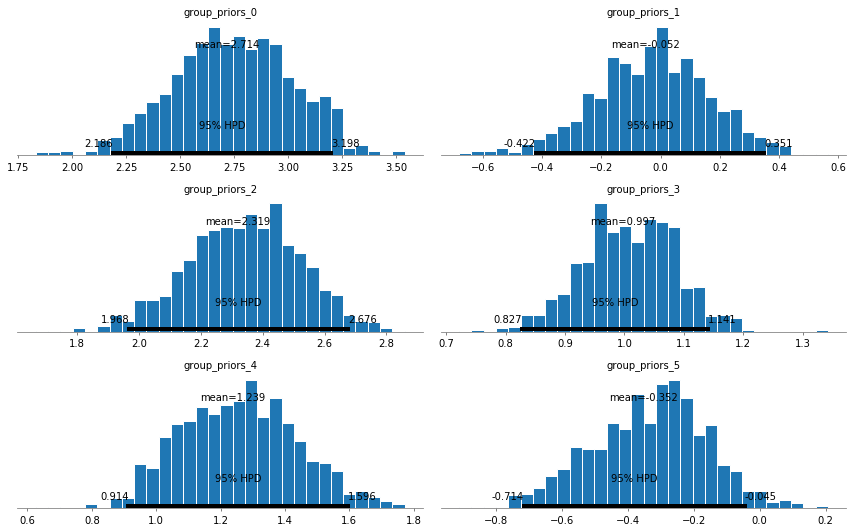

In [13]:
a = trace_logistic_model['group_priors']

a = a.transpose()
print(a[0])
#pm.plot_posterior(trace_logistic_model,varnames=['group_priors[0,0]', 'group_priors[1]','group_priors[2]', 'group_priors[3]', 'group_priors[4]', 'group_priors[5]'])
pm.plot_posterior(trace_logistic_model,varnames=['group_priors'])



plt.show()

In [14]:
variance_waic = pm.waic(trace_logistic_model, logistic_model)

print(variance_waic.WAIC)

2129.315454884187


/Users/tortysivill/Downloads/LogFiles 2/pymc3/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


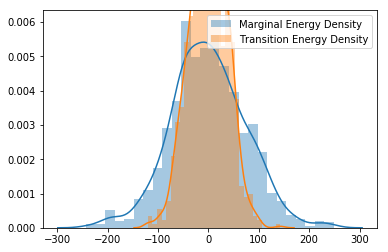

In [15]:
import seaborn as sb
energy = trace_logistic_model['energy']
energy_diff = np.diff(energy)
sb.distplot(energy - energy.mean(), label='Marginal Energy Density')
sb.distplot(energy_diff, label='Transition Energy Density')
plt.legend()
plt.show()

In [16]:
gelmans = (pm.diagnostics.gelman_rubin(trace_logistic_model))
print(gelmans)

{'mu': array([0.99971105, 1.00144411, 0.9990554 , 0.99966164, 0.99934166,
       1.00576941]), 'group_priors': array([[1.04588791, 1.01858123, 1.04005736, 1.02693372, 1.01220481,
        1.01655275]]), 'priors': array([[1.03315142, 1.00192915, 1.00038624, 1.01567196, 0.9999367 ,
        1.00010604],
       [1.00321983, 0.99984001, 0.99938674, 0.99997584, 0.99983354,
        0.99941989],
       [0.99938665, 0.99903933, 1.00247409, 1.00044273, 1.00149705,
        1.00162462],
       ...,
       [0.99904727, 1.00377089, 0.99913571, 0.9997458 , 1.00111135,
        1.00050525],
       [1.01208278, 1.02027868, 1.0083318 , 1.00009254, 1.00417441,
        1.00176258],
       [1.0109919 , 1.00578185, 1.00483845, 1.0001658 , 1.00569679,
        1.00094523]]), 'chol_packed': array([1.00009805, 1.05340195, 1.02593157, 0.99935407, 0.99932571,
       1.00268712, 1.01308885, 1.01039178, 1.00420452, 1.00985849,
       1.00735366, 1.00101079, 1.01513584, 1.08025403, 1.01170327,
       0.99961048, 1.004

11


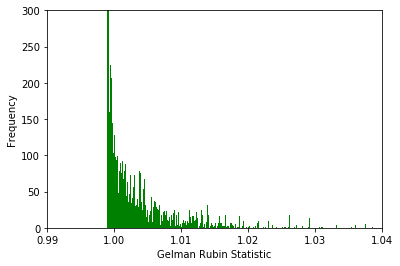

In [35]:
dictlist = [(v) for k,v in gelmans.items()]
gelmanss = []

print(len(dictlist))

i = 0
for x in dictlist:
    if i == 0:
        for y in x:
            gelmanss.append(y)
        i = i + 1
    elif i == 1:
        for y in x:
            for z in y:
                gelmanss.append(z)
        i = i + 1
    elif i == 2:
        for y in x:
            for z in y:
                gelmanss.append(z)
        i = i + 1
    elif i == 3:
        for y in x:
            gelmanss.append(y)
        i = i + 1    
    elif i == 4:
        for y in x:
            for z in y:
                gelmanss.append(z)
        i = i + 1
        
    elif i == 5:
        for y in x:
            gelmanss.append(y)
        i = i + 1      
    elif i == 6:
        for y in x:
            for z in y:
                gelmanss.append(z)
        i = i + 1
        
    elif i > 6:
        for y in x:
            gelmanss.append(y)
        i = i + 1
        
            
                
         
       
        

n_bins = 1000

n, bins, patches  = plt.hist(gelmanss, bins=n_bins, color='g')
plt.xlim(0.99,1.04)
plt.ylim(0,300)
plt.xlabel('Gelman Rubin Statistic')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(pm.diagnostics.effective_n(trace_logistic_model))

/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


{'mu': array([ 667.85136616,  644.91640164, 1679.40989364,  691.55401438,
       1041.35693117,  213.09319644]), 'group_priors': array([[ 56.04420997,  63.87040512,  53.75639546,  57.18415024,
         72.60553691, 135.27973355]]), 'priors': array([[ 79.26761704, 779.89513273, 590.95074349, 210.01368465,
        516.80356865, 692.52506867],
       [450.51550302, 421.9213631 , 393.30501163, 593.7985266 ,
        502.97390754, 530.3101315 ],
       [723.38637288, 659.81438232, 490.47711892, 563.4022985 ,
        762.5653005 , 239.04918595],
       ...,
       [324.11282324, 253.23931196, 364.82016832, 492.43936643,
        298.93407711, 888.48760375],
       [ 80.70559626, 162.02614599, 137.16125128, 457.50397541,
        235.06676613, 482.2944977 ],
       [199.36271146, 345.99924503, 576.80596738, 593.35360227,
        372.42142436, 262.93187521]]), 'chol_packed': array([197.95596218,  25.93864927,  68.02946858,  79.91923428,
        57.52428658,  93.98559824,  88.10000166,  57.1583521

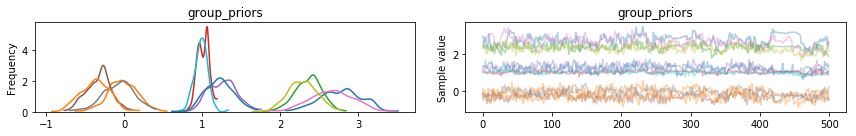

In [19]:
pm.traceplot(trace_logistic_model, varnames=['group_priors'])
plt.show()

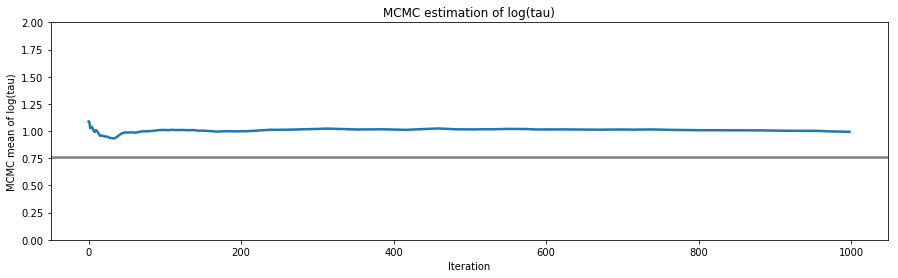

In [100]:
priors_norm = trace_logistic_model['group_priors']
priors_norm = priors_norm.transpose()
priors_norm_a = []
for i in priors_norm:
    for j in i:
        priors_norm_a.append(j)
logtau = np.log(priors_norm_a[0])
mlogtau = [np.mean(logtau[:i]) for i in np.arange(1, len(logtau))]    
plt.figure(figsize=(15, 4))
plt.axhline(0.7657852, lw=2.5, color='gray')
plt.plot(mlogtau, lw=2.5)
plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(tau)')
plt.title('MCMC estimation of log(tau)')

plt.show()

In [88]:
divergent = trace_logistic_model['diverging']
print('Number of Divergent %d' % divergent.nonzero()[0].size)
divperc = divergent.nonzero()[0].size/len(trace_logistic_model)
print('Percentage of Divergent %.5f' % divperc)

Number of Divergent 12
Percentage of Divergent 0.02400


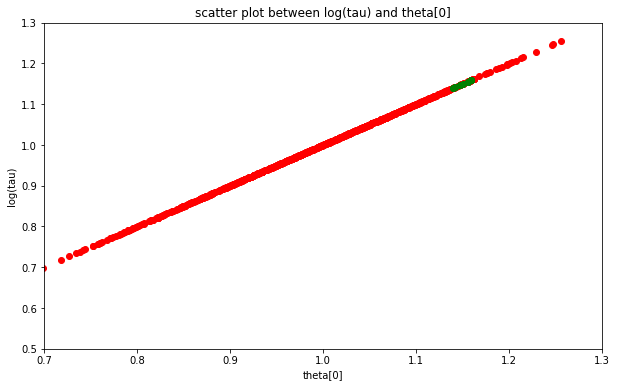

In [106]:
theta_trace = logtau
theta0 = logtau
plt.figure(figsize=(10, 6))
plt.scatter(theta0[divergent == 0], logtau[divergent == 0], color='r')
plt.scatter(theta0[divergent == 1], logtau[divergent == 1], color='g')
plt.axis([0.7, 1.3, 0.5, 1.3])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')
plt.show()

In [23]:
"""young_mean = np.mean(trace_logistic_model['young_group_prior'])
old_mean = np.mean(trace_logistic_model['old_group_prior'])
self_mean = np.mean(trace_logistic_model['self_group_prior'])
kneeling_mean = np.mean(trace_logistic_model['kneeling_group_prior'])
pavement_mean = np.mean(trace_logistic_model['pavement_group_prior'])
man_mean = np.mean(trace_logistic_model['man_group_prior'])"""


young_mean = np.mean(a[0])
old_mean = np.mean(a[1])
self_mean = np.mean(a[2])
kneeling_mean = np.mean(a[3])
pavement_mean = np.mean(a[4])
man_mean = np.mean(a[5])

In [24]:
min_value = min(young_mean, old_mean, self_mean, kneeling_mean, pavement_mean, man_mean)
max_value = max(young_mean, old_mean, self_mean, kneeling_mean, pavement_mean, man_mean)
diff_value = max_value - min_value

young_mean = (young_mean - min_value)/diff_value
old_mean = (old_mean - min_value)/diff_value
self_mean = (self_mean - min_value)/diff_value
kneeling_mean = (kneeling_mean - min_value)/diff_value
pavement_mean = (pavement_mean - min_value)/diff_value
man_mean = (man_mean - min_value)/diff_value






In [25]:
b = trace_logistic_model['priors']

"""self_results = trace_logistic_model['B0'].mean(axis=0)
old_results = trace_logistic_model['B1'].mean(axis=0)
young_results = trace_logistic_model['B2'].mean(axis=0)
man_results = trace_logistic_model['B3'].mean(axis=0)
kneeling_results = trace_logistic_model['B4'].mean(axis=0)
pavement_results = trace_logistic_model['B5'].mean(axis=0)"""

self_results = (b[0].mean(axis=1))
old_results =  (b[1].mean(axis=1))
young_results = (b[2].mean(axis=1))
man_results =  (b[3].mean(axis=1))
kneeling_results =  (b[4].mean(axis=1))
pavement_results =  (b[5].mean(axis=1))



complete_results = np.asarray((self_results, old_results, young_results, man_results, kneeling_results, pavement_results))
complete_results = complete_results.transpose()
complete_results = np.reshape(complete_results, (200,6))

In [26]:
print(complete_results)
print(complete_results[0,0])

[[1.46560093 0.94536229 1.35693676 1.37003254 1.1977064  1.25806222]
 [1.58344734 1.03559078 1.31711228 1.35935335 1.12653835 1.50931289]
 [1.26143409 0.95727678 1.40088645 0.8447435  1.60027285 0.07208626]
 ...
 [0.97980404 1.30392634 1.61557396 1.06227524 0.93607657 1.13213183]
 [0.1940047  1.40601104 0.89781937 0.81685448 0.60546231 1.02067045]
 [1.6138305  1.39008607 1.36598987 1.49939874 1.47381386 1.23635567]]
1.4656009314813687


In [27]:
test_data_ids = []
test_tester_ids = []
test_level_ids = []
test_contexts = []
test_left_obstacles = []
test_right_obstacles = []
test_decisions = []
test_start_lane = []

In [28]:
data_new_test_formatted = []

for i in range(0,200):
    data_new_test_formatted.append([])

    
for j in data_new_test:
    data_new_test_formatted[j[0]].append(j)
    
print(data_new_test_formatted)

[[[0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], [[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]], [[2, 0, 0, 0, 1, 0, 0, 0, 1

In [29]:

j = 0
truth_decisions = []
predictions = []
contexts = []
left = []
right = []
for j in range(0,200):
    self_weight = complete_results[j,0]
    old_weight = complete_results[j,1]
    young_weight =complete_results[j,2]
    man_weight = complete_results[j,3]
    kneeling_weight = complete_results[j,4]
    pavement_weight = complete_results[j,5]
    
    min_value = min(young_weight, old_weight, self_weight, kneeling_weight, pavement_weight, man_weight)
    max_value = max(young_weight, old_weight, self_weight, kneeling_weight, pavement_weight, man_weight)
    diff_value = max_value - min_value

    young_weight = (young_weight - min_value)/diff_value
    old_weight = (old_weight - min_value)/diff_value
    self_weight = (self_weight - min_value)/diff_value
    kneeling_weight = (kneeling_weight - min_value)/diff_value
    pavement_weight = (pavement_weight - min_value)/diff_value
    man_weight = (man_weight - min_value)/diff_value

    for i in data_new_test_formatted[j]:
        stay_matrix = [i[1],i[2],i[3],i[4],i[5],i[6]]
        switch_matrix = [i[7],i[8],i[9],i[10],i[11],i[12]]
        
        print(stay_matrix)
        print(switch_matrix)
        print(i[13])
        print("#########")
        
        stay_utility = self_weight*switch_matrix[0] + old_weight*switch_matrix[1] + young_weight*switch_matrix[2] + man_weight*switch_matrix[3] + kneeling_weight*switch_matrix[4] + pavement_weight*switch_matrix[5]
        switch_utility = self_weight*stay_matrix[0] + old_weight*stay_matrix[1] + young_weight*stay_matrix[2] + man_weight*stay_matrix[3] + kneeling_weight*stay_matrix[4] + pavement_weight*stay_matrix[5]
        
        overall_utility1 = switch_utility - stay_utility
        overall_utility2 = stay_utility - switch_utility
        
        probability1 = 1/(1 + np.exp(-overall_utility1))
        probability2 = 1/(1 + np.exp(-overall_utility2))
                         
        if probability1 > probability2:
            predictions.append(1)
        else:
            predictions.append(0)

        truth_decisions.append(i[13])
        #contexts.append(i[5])
        #left.append(left_matrix)
        #right.append(right_matrix)

[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 7, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 0, 7, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########


0
#########
[0, 0, 0, 5, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 3, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 4, 0, 0]
[1, 0, 0, 0, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]


0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 7, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 7, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 4, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]


1
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 0, 5, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 7, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 5, 0, 0]
[1, 0, 0, 0, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]


[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 7, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 3, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 5, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]


#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 0, 3, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0


[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 6, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 3, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 4, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[0, 0, 0, 2, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 7, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 2, 0, 0, 0]


[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 5, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########


In [30]:
i = 0
total = 0
correct = 0
for j in truth_decisions:
    print(j)
    if j == predictions[i]:
        correct = correct + 1
    total = total + 1
    i = i + 1
        

1
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
1
1
0
1
0
1
0
0
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
0
0
0
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
0
0
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
0
1
1
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
0
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
0
1
0
1
0
1
1
1
0
0
1
0
0
1
1
0
1
0
1
1
0
0
1
1
1
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
0
1
1
1
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
0
0
1
0
0
1
1
0
1
0
0
0


In [31]:
print(correct/total)

0.6236457842675459


In [32]:
print(self_weight)
print(old_weight)
print(young_weight)
print(man_weight)
print(kneeling_weight)
print(pavement_weight)

1.0
0.40726000713059635
0.3434247604008173
0.6968493008874432
0.6290702692963637
0.0
